### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Read CSV

In [2]:
df_init = pd.read_csv(r"C:\Users\balajim1\Downloads\loan\loan.csv")

In [3]:
### Check Columns

In [4]:
df_init.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
### Drop unneccesarry columns. Creating new df for manipulations

In [6]:
df = df_init.copy().dropna(axis = 1, how = 'all')

In [7]:
df.shape

(39717, 57)

In [8]:
# Create a list of columns where the unique value count is 1
remove_columns_list = [col for col in df.columns if df[col].nunique() == 1]

# Remove those columns
df.drop(remove_columns_list, axis = 1, inplace = True)

In [9]:
df.shape

(39717, 48)

In [10]:
#duplicate check
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [11]:
#drop other unnecessary columns

In [12]:
noInfoCols = ['desc','id','title','emp_title','url','member_id','collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','zip_code']


In [13]:
df.drop(noInfoCols,axis=1,inplace=True)

In [14]:
df.shape

(39717, 21)

In [15]:
#remove current rows from loan_status as this will not help arrive at conclusion

In [16]:
df = df[df['loan_status'].str.lower() != "current"]

In [17]:
df.shape[0]

38577

In [18]:
100*df.isnull().mean().sort_values(ascending=False)

next_pymnt_d              100.000000
mths_since_last_record     92.897322
mths_since_last_delinq     64.559193
emp_length                  2.677761
pub_rec_bankruptcies        1.806776
verification_status         0.000000
dti                         0.000000
addr_state                  0.000000
purpose                     0.000000
loan_status                 0.000000
issue_d                     0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
home_ownership              0.000000
sub_grade                   0.000000
grade                       0.000000
installment                 0.000000
int_rate                    0.000000
term                        0.000000
funded_amnt_inv             0.000000
annual_inc                  0.000000
dtype: float64

In [19]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,NaN,NaN,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,NaN,NaN,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,Fully Paid,other,CA,20.00,35.0,NaN,NaN,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0.0,0.0,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,5.0,0.0,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0.0,0.0,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0.0,0.0,NaN,NaN


In [20]:
#drop null values more than 65%

In [21]:
df = df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [22]:
#imputing values

In [23]:
df['emp_length'].fillna(df['emp_length'].mode()[0],inplace=True)

In [24]:
#pub_rec_bankruptcies check. Dropping rows for saferside as crucial value

In [25]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

pub_rec_bankruptcies
0.0    36238
1.0     1637
NaN      697
2.0        5
Name: count, dtype: int64

In [26]:
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [27]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [28]:
mapping_dict = {
    '< 1 year': 0, 
    '1 year': 1, 
    '2 years': 2, 
    '3 years': 3,
    '4 years': 4, 
    '5 years': 5, 
    '6 years': 6, 
    '7 years': 7,
    '8 years': 8, 
    '9 years': 9, 
    '10+ years': 10
}

In [29]:
df['emp_length'] = df['emp_length'].replace(mapping_dict)

In [30]:
#converting Source verified to verified for simplicity

In [31]:
df.verification_status.value_counts()

verification_status
Not Verified       15998
Verified           12205
Source Verified     9677
Name: count, dtype: int64

In [32]:
df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [33]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [34]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [35]:
#convert dtypes

In [36]:
df['term'] = df['term'].str.replace(' months', '').astype(int)
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [37]:
df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

In [38]:
num_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','emp_length','annual_inc','dti','pub_rec_bankruptcies']
cat_cols = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state']
date_cols = ['issue_d']
len(num_cols)+len(cat_cols)+len(date_cols)

18

In [39]:
#Outlier treatment

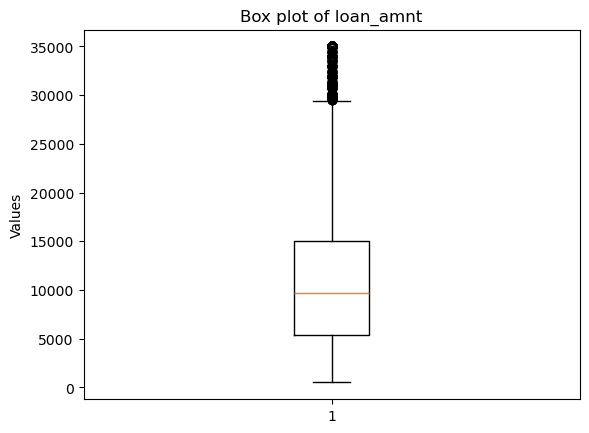

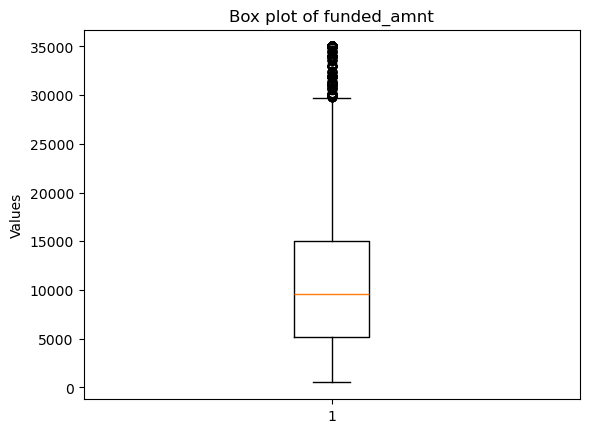

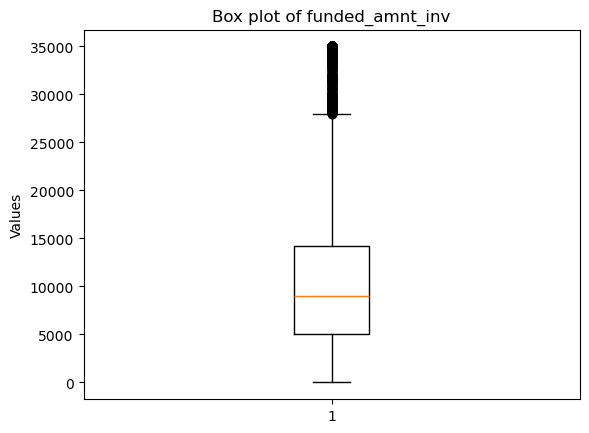

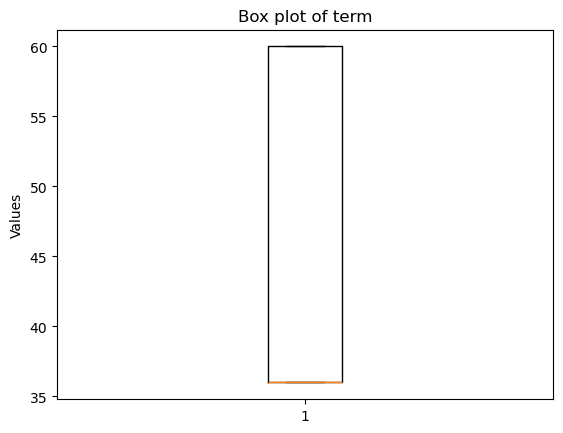

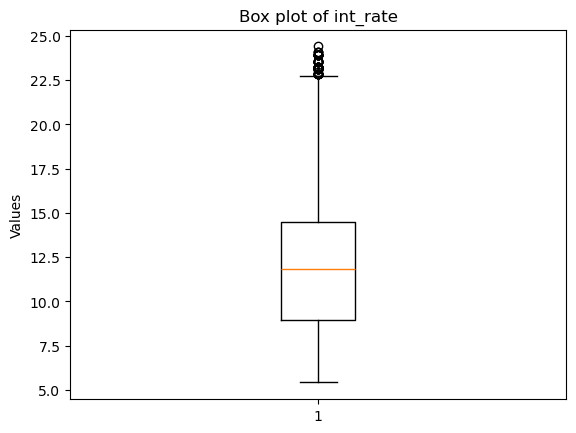

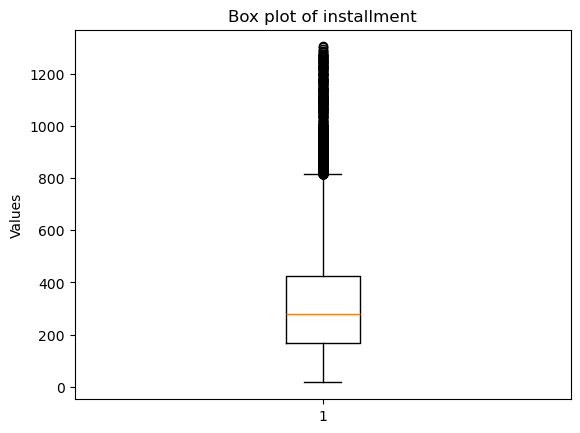

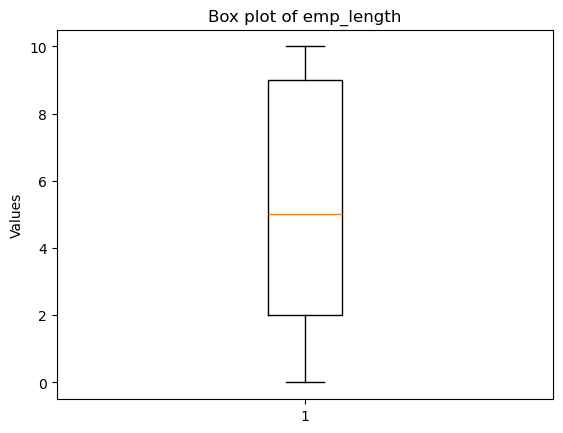

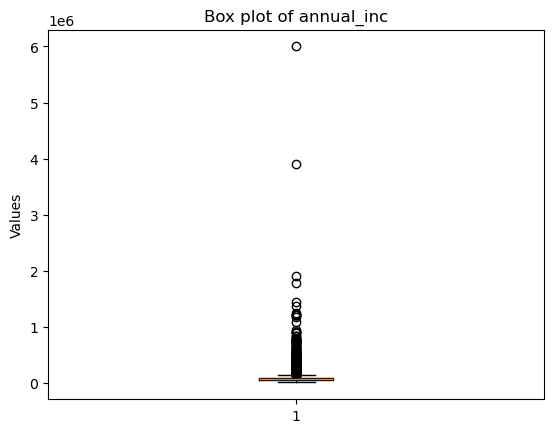

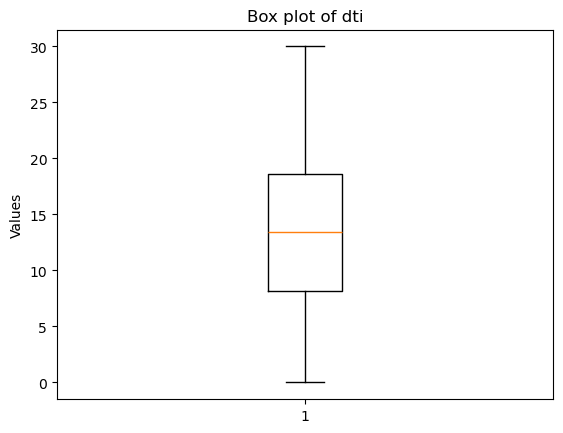

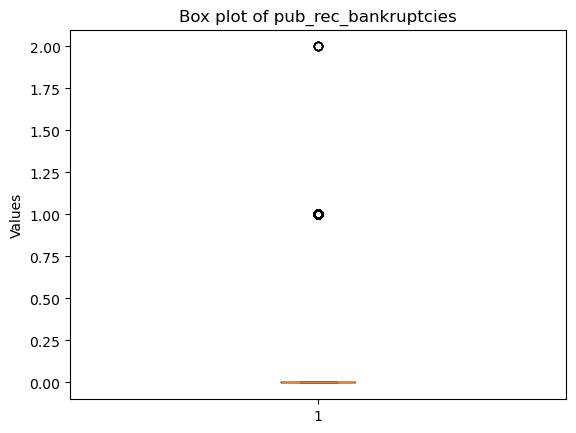

In [40]:
for col in num_cols:
    plt.boxplot(df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel('Values')
    plt.show()

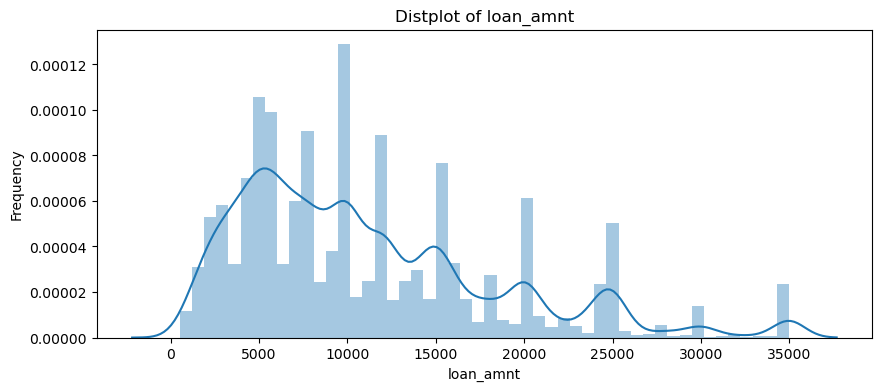

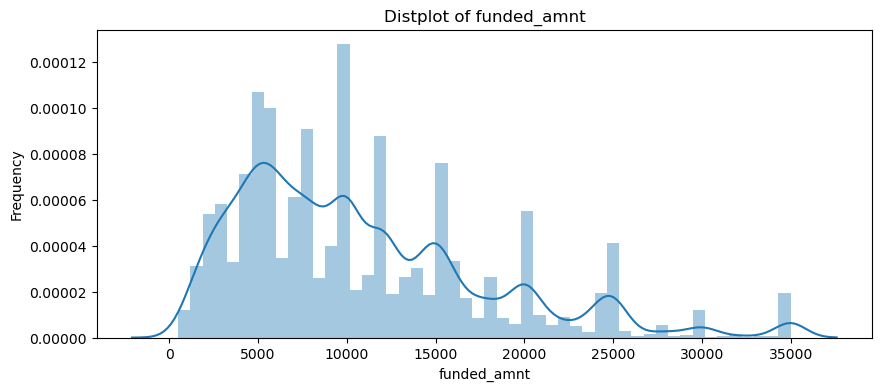

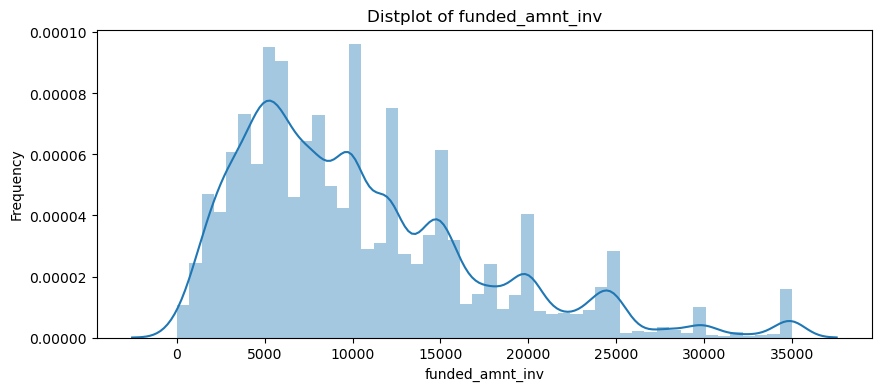

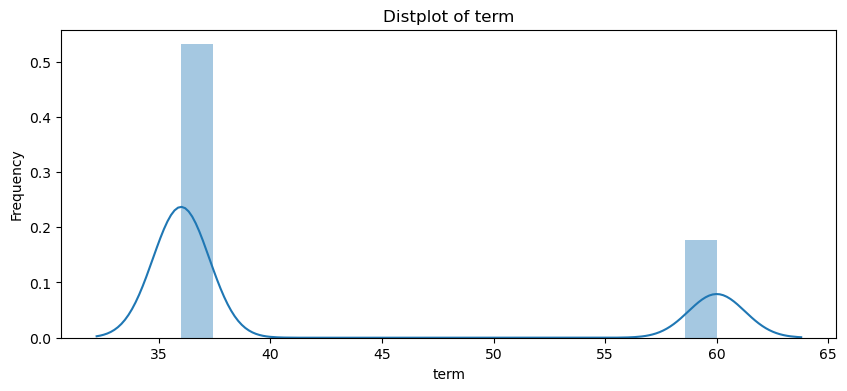

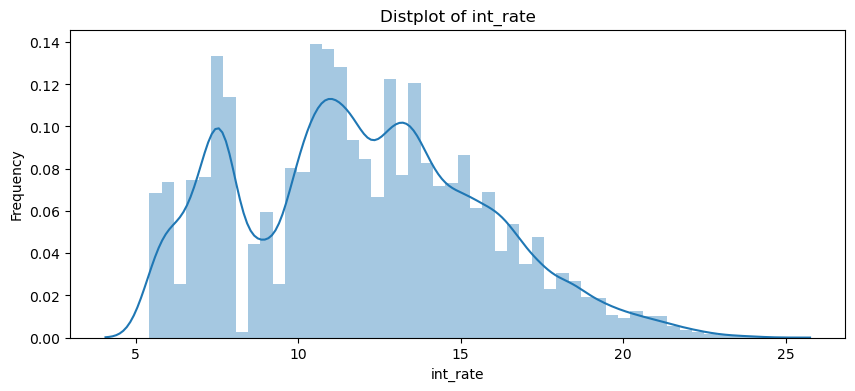

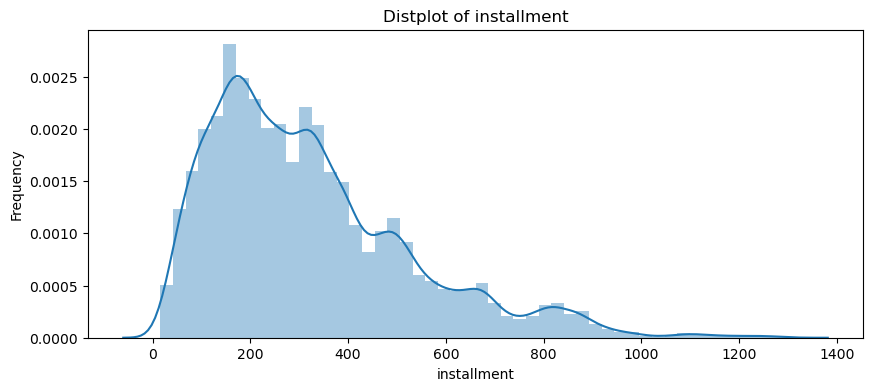

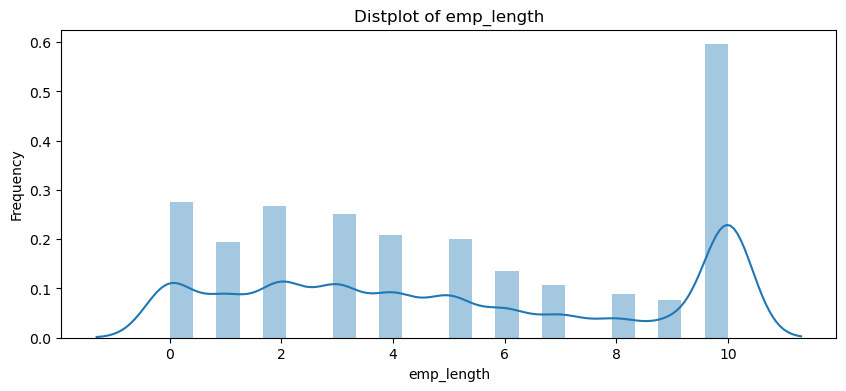

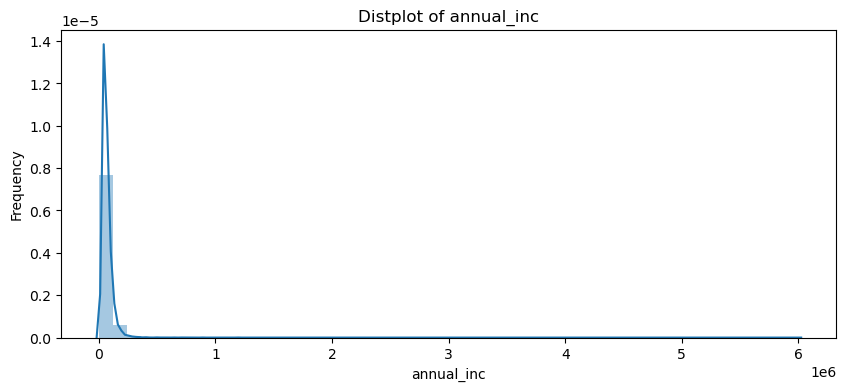

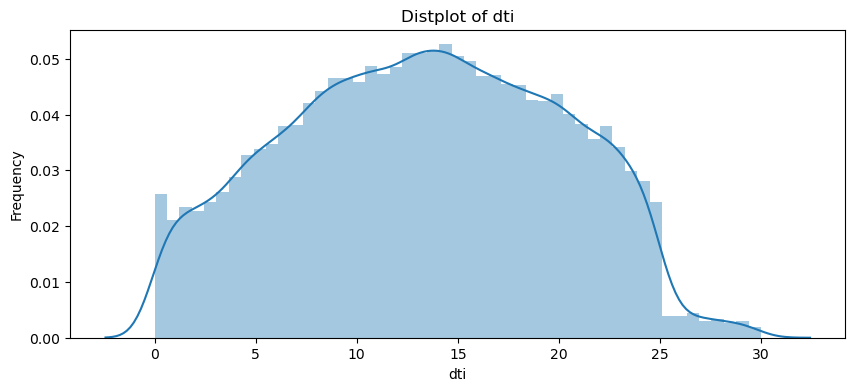

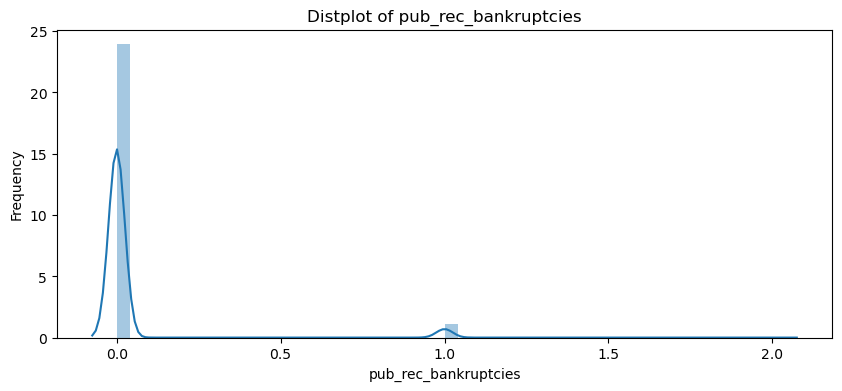

In [41]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.distplot(df[col].dropna())
    plt.title(f'Distplot of {col}')
    plt.ylabel('Frequency')
    plt.show()

In [42]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['annual_inc'] >= Q1 - 1.5 * IQR) & (df['annual_inc'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

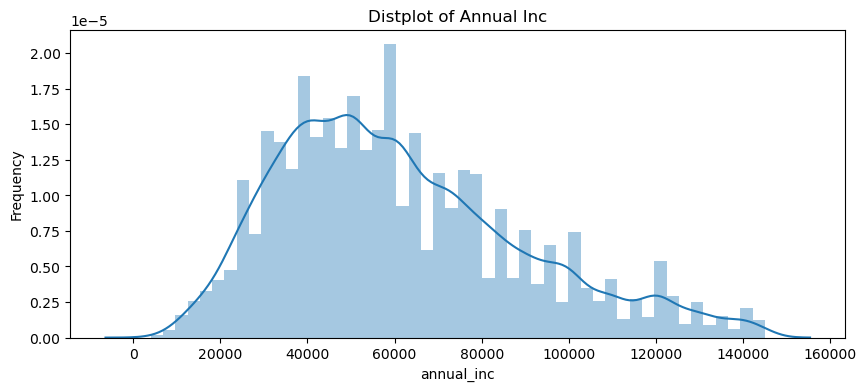

In [43]:
    plt.figure(figsize=(10, 4))
    sns.distplot(df['annual_inc'].dropna())
    plt.title(f'Distplot of Annual Inc')
    plt.ylabel('Frequency')
    plt.show()

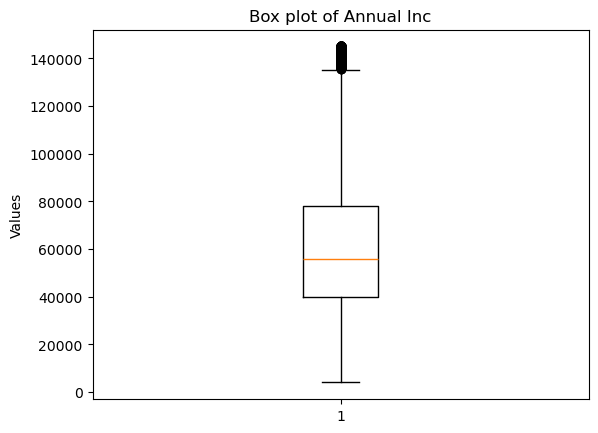

In [44]:
plt.boxplot(df['annual_inc'].dropna())
plt.title(f'Box plot of Annual Inc')
plt.ylabel('Values')
plt.show()

In [45]:
#Derived Columns

In [46]:
#Month and Year from issue_d
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year

In [47]:
#def for bucketing values

def create_threshold_column(df, column, thresholds, labels, new_column_name):
   
    # Check if the lengths of thresholds and labels are equal
    if len(thresholds) != len(labels) + 1:
        raise ValueError("The length of thresholds must be one more than the length of labels.")

    # Create a new column based on the thresholds
    df[new_column_name] = pd.cut(df[column], bins=thresholds, labels=labels, include_lowest=True)

    return df


In [48]:
quarter_thresholds = [0, 3, 6, 9, np.inf]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

df = create_threshold_column(df, 'issue_m', quarter_thresholds, quarter_labels, 'issue_q')

In [49]:
# Categorising Loan Amount
loan_thresholds = [0, 5000, 10000, 15000, np.inf]
loan_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df = create_threshold_column(df, 'loan_amnt', loan_thresholds, loan_labels, 'loan_amnt_bucket')

In [50]:
df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000,0 - 5K
1,2500,0 - 5K
2,2400,0 - 5K
3,10000,5K - 10K
5,5000,0 - 5K
...,...,...
39562,4800,0 - 5K
39573,7000,5K - 10K
39623,9000,5K - 10K
39666,15450,15K - above


In [51]:
# Categorising int_rate
int_rate_thresholds = [0, 5, 9, 13, 17, 21, np.inf]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df = create_threshold_column(df, 'int_rate', int_rate_thresholds, int_rate_labels, 'int_rate_bucket')

In [52]:
df[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39562,10.28,9%-13%
39573,10.59,9%-13%
39623,12.49,9%-13%
39666,11.22,9%-13%


In [53]:
# Bucketting Annual Income
annual_inc_thresholds = [0,40000, 50000, 60000, 70000, 80000,np.inf]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
df = create_threshold_column(df, 'annual_inc', annual_inc_thresholds, annual_inc_labels, 'annual_inc_bucket')

In [54]:
df[['annual_inc','annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39562,35000.0,0 - 40k
39573,63500.0,60k - 70k
39623,39000.0,0 - 40k
39666,40000.0,0 - 40k


In [55]:
# Bucketting Funded Amount
funded_amnt_thresholds = [0,5000, 10000, 15000,np.inf]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
df = create_threshold_column(df, 'funded_amnt', funded_amnt_thresholds, funded_amnt_labels, 'funded_amnt_bucket')
df[['funded_amnt','funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000,0 - 5k
1,2500,0 - 5k
2,2400,0 - 5k
3,10000,5k - 10k
5,5000,0 - 5k
...,...,...
39562,4800,0 - 5k
39573,7000,5k - 10k
39623,9000,5k - 10k
39666,15450,15k - above


In [56]:
# Bucketting DTI
dti_thresholds = [0,8, 12, 16, 20,np.inf]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df = create_threshold_column(df, 'dti', dti_thresholds, dti_labels, 'dti_bucket')
df[['dti','dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,High
5,11.20,Low
...,...,...
39562,7.51,Very Low
39573,8.50,Low
39623,5.08,Very Low
39666,13.50,Medium


In [57]:
#Univariate Analysis - Ordered Categorical Variables

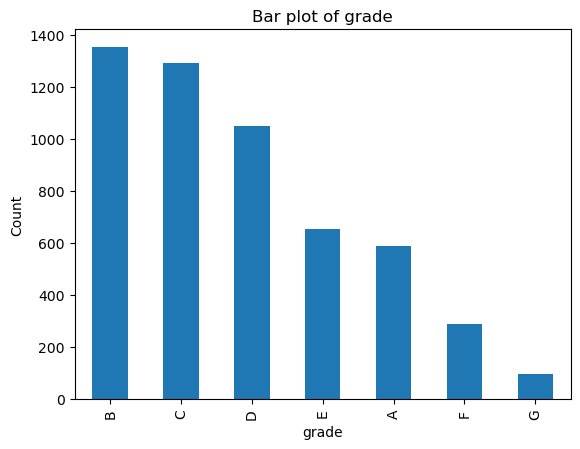

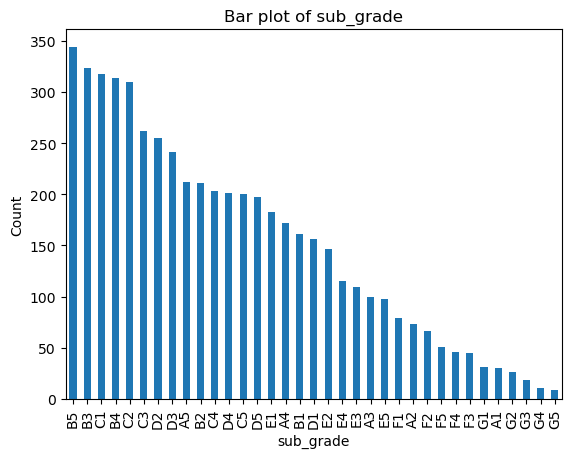

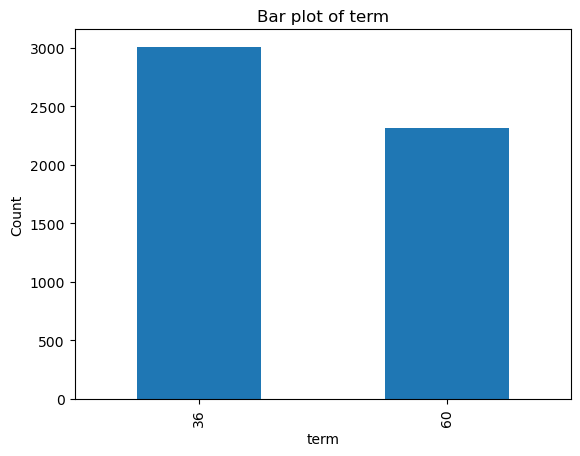

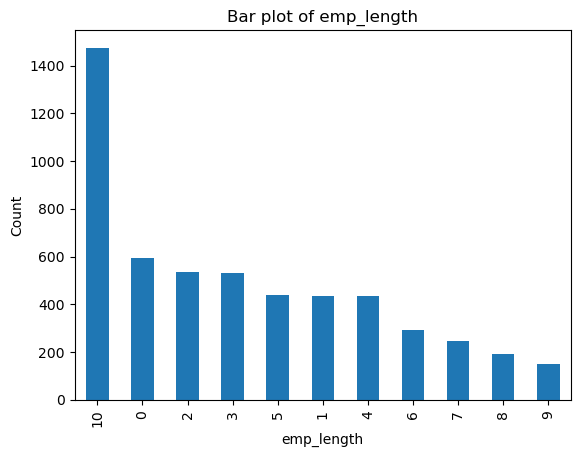

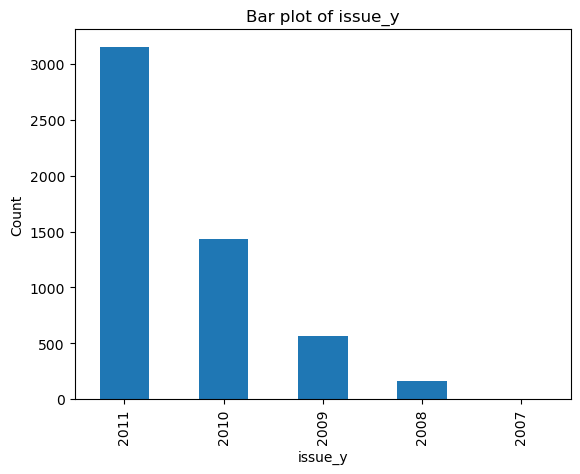

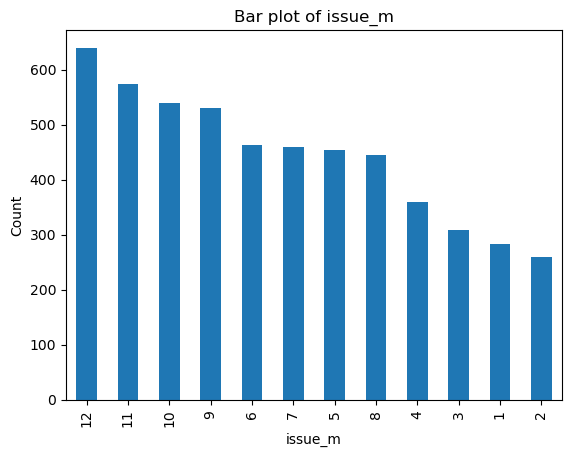

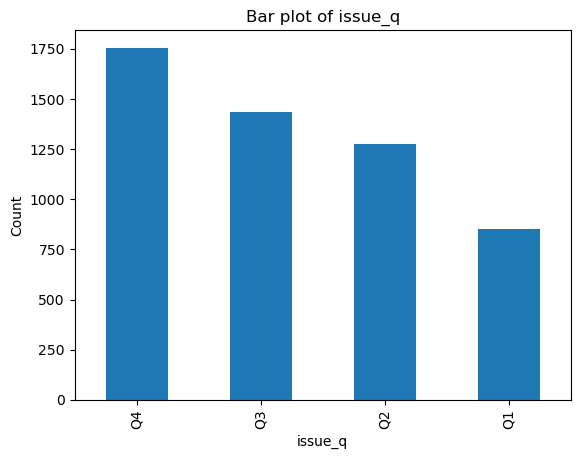

In [58]:
ordered_categorical_variables = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']

# Filter the DataFrame
df_ChargedOff = df[df['loan_status'] == 'Charged Off']


for column in ordered_categorical_variables:
    df_ChargedOff[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')    
    plt.show()

Inference:
Grade B applicants topped the “Charged Off” list hinting at repayment difficulties for this group.
Short-term loans (36 months) were favoured by “Charged Off” applicants suggesting defaults were higher among those opting for shorter repayment periods.
Applicants with over 10 years of employment had the most “Charged Off” applications indicating that a lengthy employment history didn’t necessarily equate to successful loan repayment.
The year 2011 saw the highest number of “Charged Off” applications possibly reflecting economic or financial hardships during that period.
The 4th quarter, particularly December, witnessed a surge in “Charged Off” loans implying that holiday season financial stress could be a factor in loan defaults.


In [59]:
#Univariate Analysis - Unordered Categorical Variables

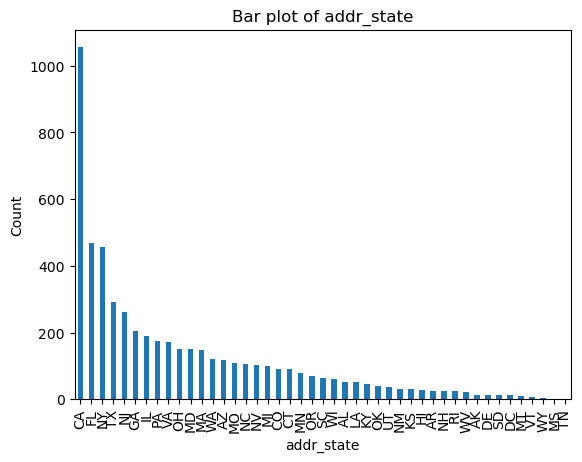

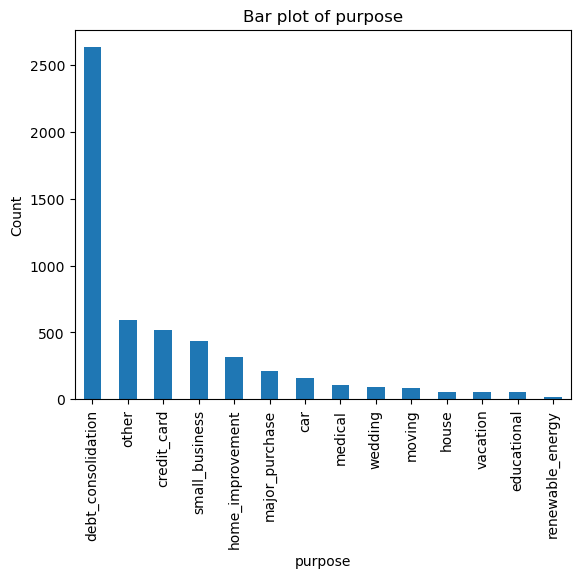

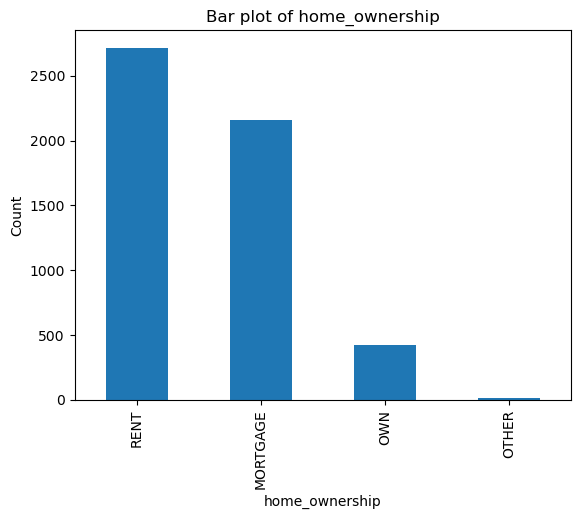

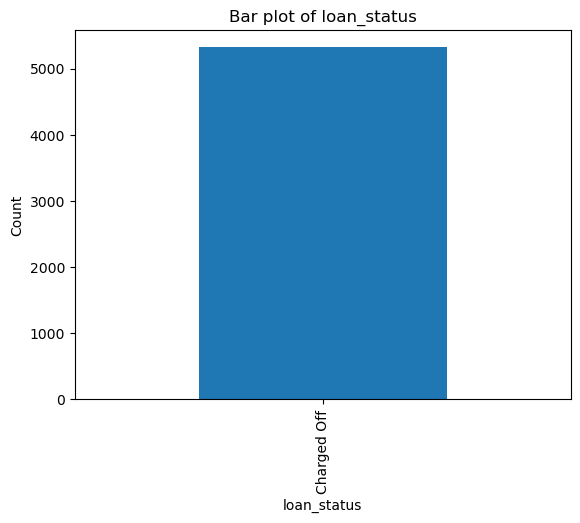

In [60]:
unordered_categorical_variables = ['addr_state', 'purpose', 'home_ownership', 'loan_status']

for column in unordered_categorical_variables:
    df_ChargedOff[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Inference:
California had the most "Charged Off" applicants indicating a need for stricter credit assessments.
Debt consolidation was the main reason for most "Charged Off" loans suggesting caution for such loans.
Most "Charged Off" applicants lived in rented, mortgagaed houses implying financial instability.
Many applicants were loan defaulters highlighting the need for enhanced risk assessment and financial education.


In [61]:
#Univariate Analysis - Quantitative Variables

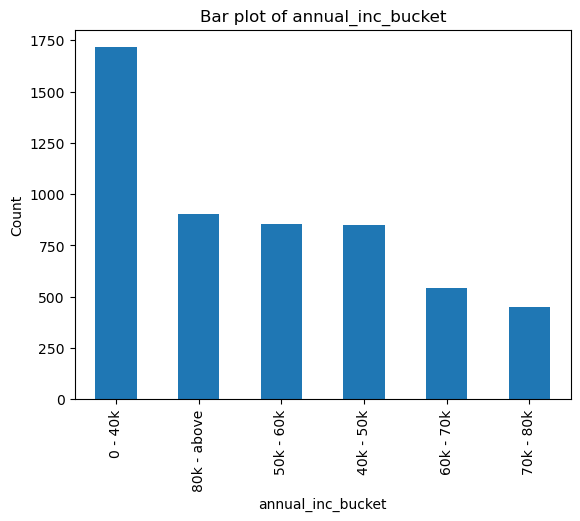

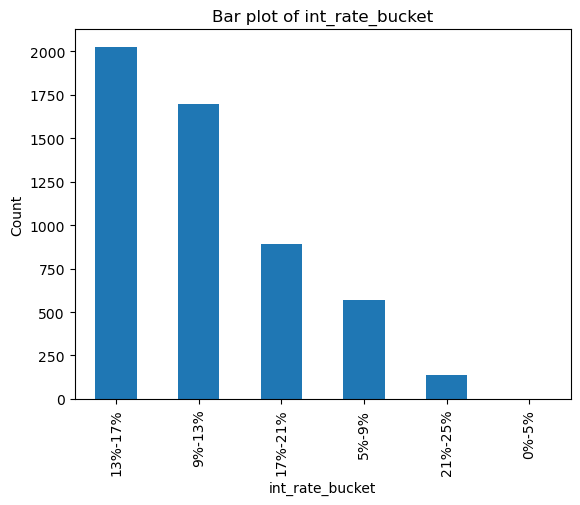

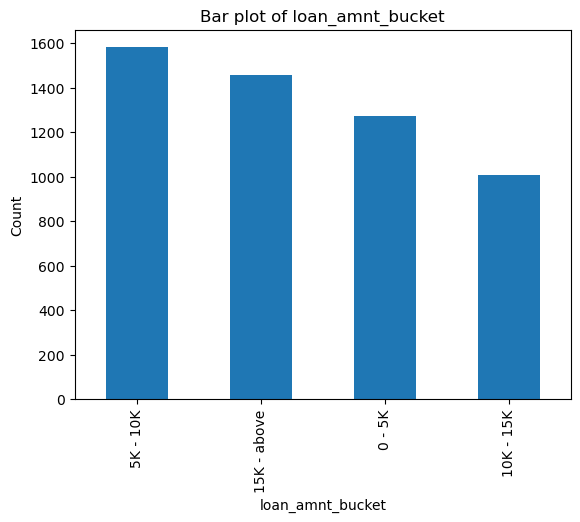

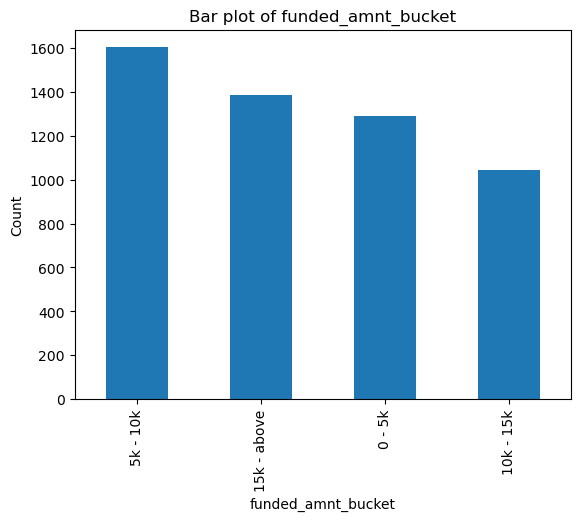

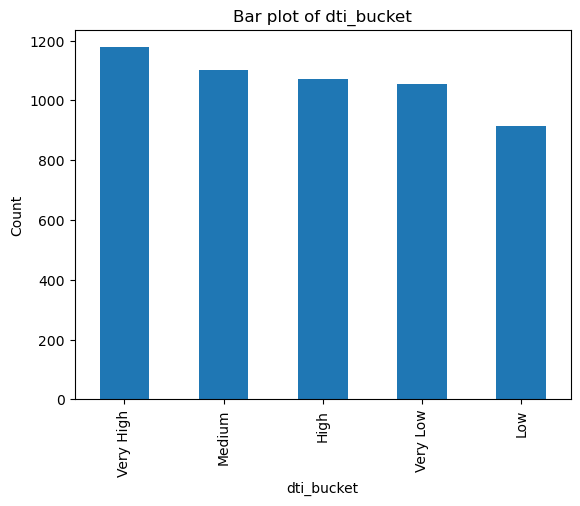

In [62]:
quantitative_variables = ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']

for column in quantitative_variables:
    df_ChargedOff[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Inference:
 “Charged Off” applicants earned less than $40,000 annually. Lenders should enforce stringent income checks and repayment assessments for this group.
A significant portion of “Charged Off” applicants fell into the 13%-17% interest rate bracket. Lenders could consider lower interest rates to reduce default risk.
“Charged Off” applicants received loans of $15,000 or more. Lenders should carefully evaluate applicants seeking larger loans, ensuring strong credit history and repayment capability.
“Charged Off” applicants received funded amounts of $15,000 or more. Lenders should align funded amounts with borrowers’ financial capacity and conduct thorough credit assessments for larger loan requests.
“Charged Off” applicants had high debt-to-income ratios. Lenders should enforce strict debt-to-income ratio requirements to avoid lending to individuals with unsustainable debt levels.
Most “Charged Off” applicants had monthly installments between $160-$440. Lenders should closely monitor and assess applicants with similar installment amounts to mitigate loan default risk.


In [63]:
#Bivariate Analysis

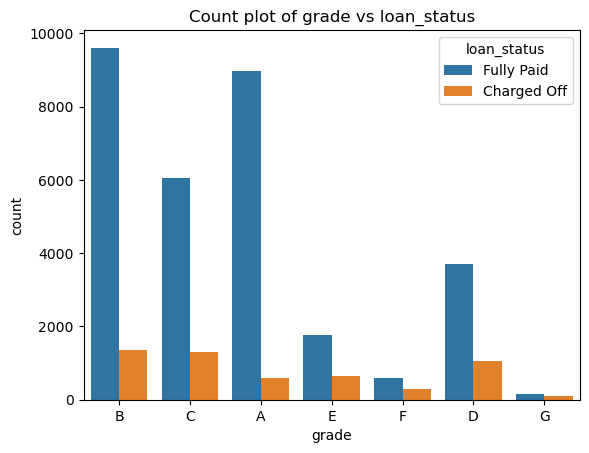

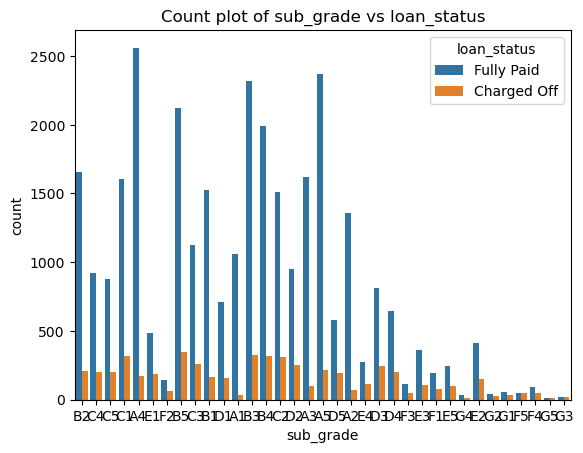

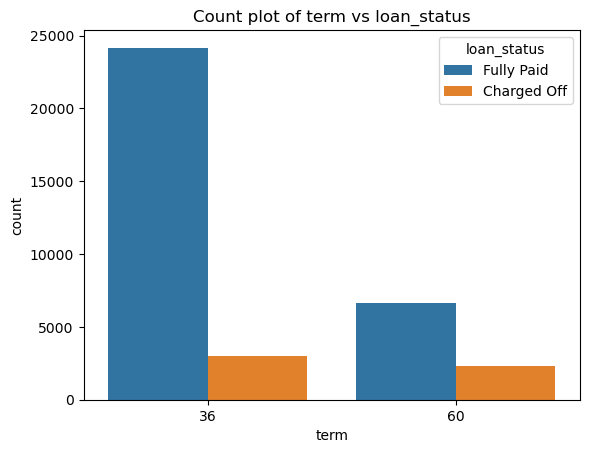

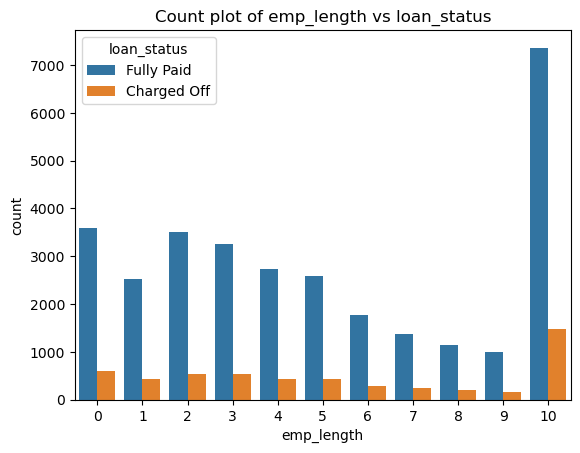

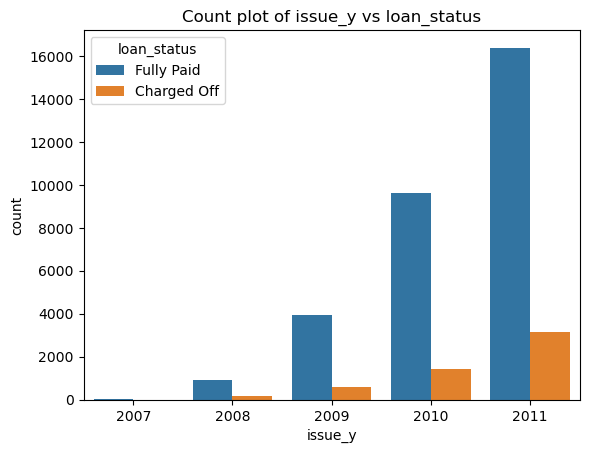

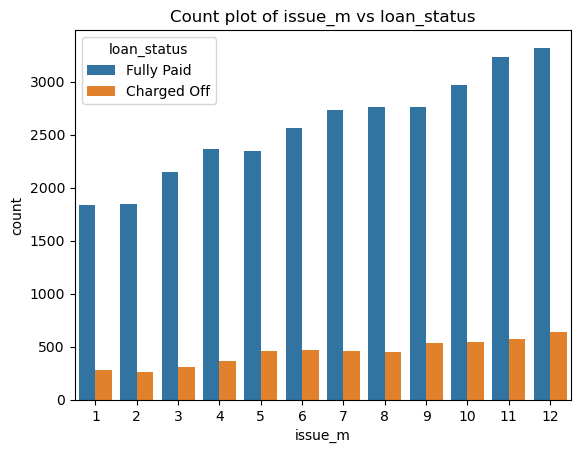

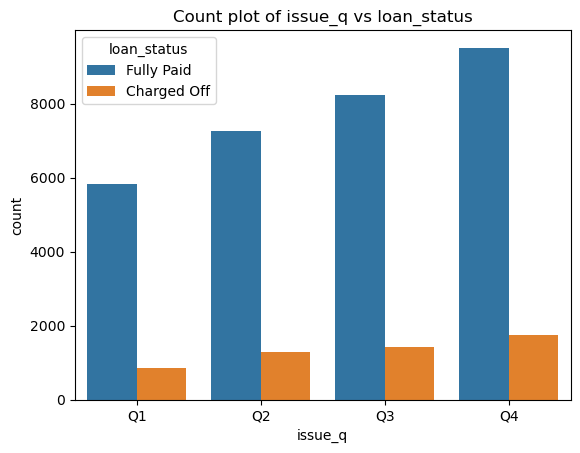

In [64]:
#Bivariate Ordered categorical data
boc_columns_to_plot = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']
for column in boc_columns_to_plot:
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'Count plot of {column} vs loan_status')
    plt.show()

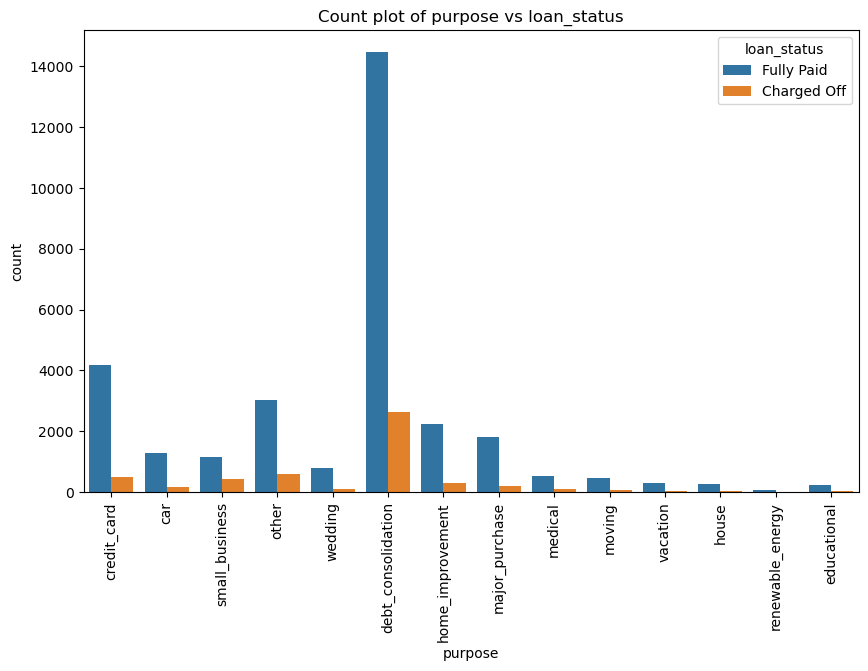

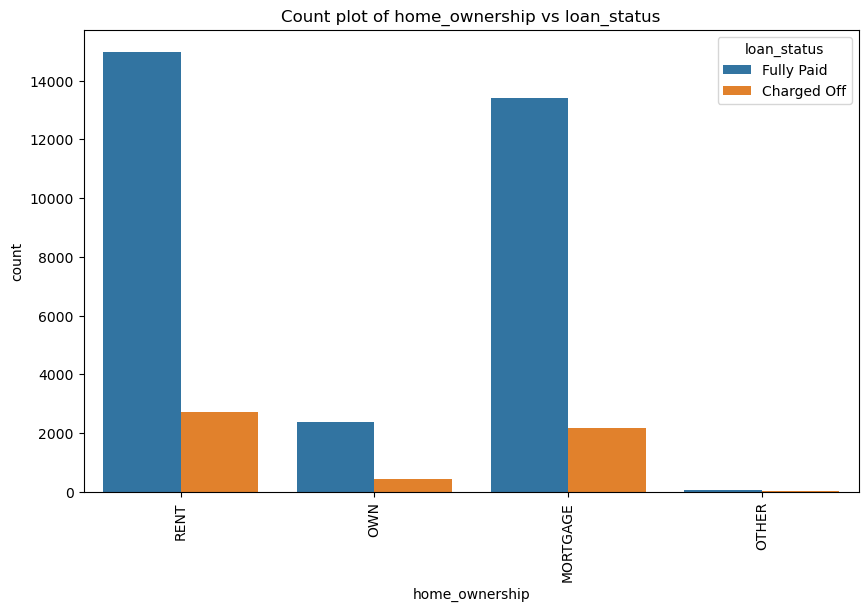

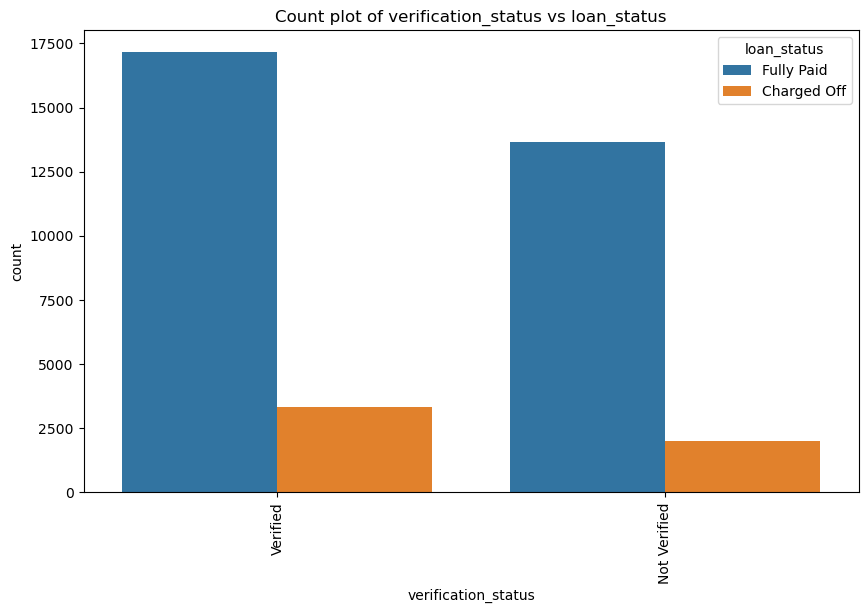

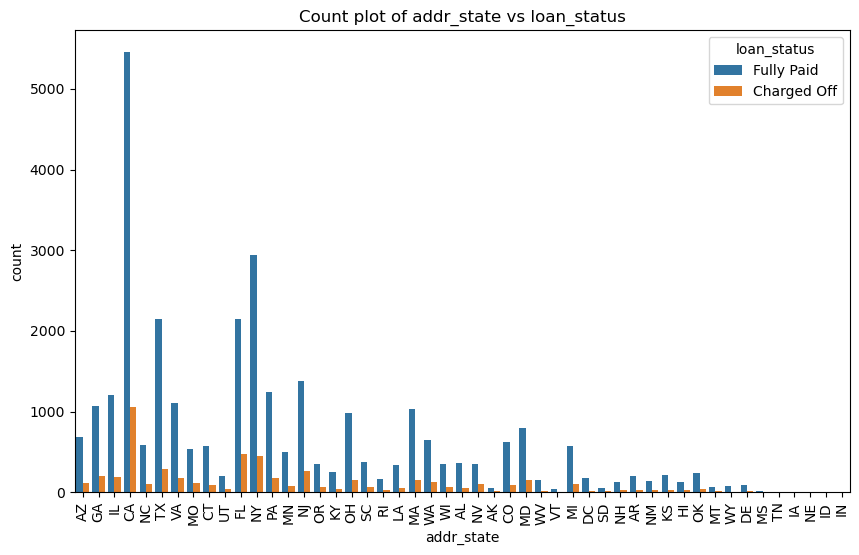

In [65]:
#Bivariate UnOrdered categorical data
buoc_columns_to_plot = ['purpose', 'home_ownership', 'verification_status', 'addr_state']
for column in buoc_columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'Count plot of {column} vs loan_status')
    plt.xticks(rotation='vertical')
    plt.show()

Inference:
Risk Assessment: Stricter criteria should be applied to loan applicants from Grades B, C, and D due to their high charge-off rates.
•	Subgrades B3, B4, and B5: These applicants are more likely to charge off. Consider additional risk mitigation measures or lower loan amounts.
•	Term Length: The risk of default is higher for 60-month loans. Consider limiting the maximum term or adjusting interest rates.
•	Experience: Applicants with over ten years of experience have a higher default probability. A comprehensive credit scoring system should be used.
•	Growth Trend: The increasing number of loan applicants from 2007 to 2011 indicates market growth. Maintain competitive edge and robust risk management.
•	Seasonal Trends: December and Q4 see peak loan applications. Ensure efficient processing to meet increased demand.
•	Debt Consolidation Risk: This category has the most loans and high default rates. Carefully evaluate these applicants and consider adjusting interest rates or offering counseling.
•	Housing Status: Default risk is higher for applicants in rented or mortgaged houses. Consider this in the underwriting process.
•	Verification Process: Verified applicants are defaulting more. Review the verification process for potential improvements.
•	Geographic Risk: Default risk is higher in CA, FL, and NY. Monitor regional trends and adjust lending strategies accordingly.
•	High Loan Amounts: Default risk is higher for loans of $15,000 or more. Consider thorough assessments or capping loan amounts for these applicants.
•	DTI and Interest Rates: High DTI ratios and interest rates of 13%-17% are linked to defaults. Review the interest rate determination process and consider adjustments based on DTI.
•	Low Annual Income: Default likelihood is higher for those earning less than $40,000 annually. Consider offering financial education or setting loan amounts based on income.


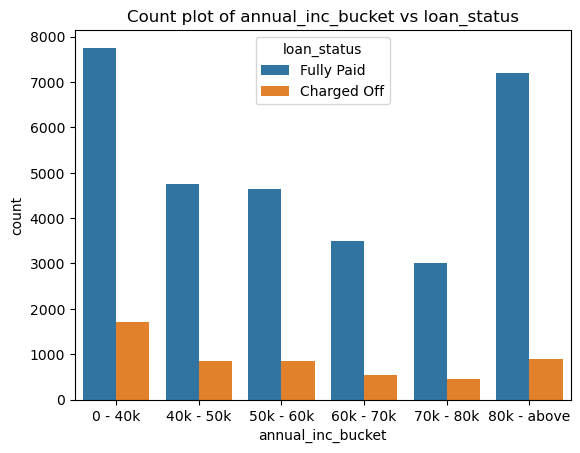

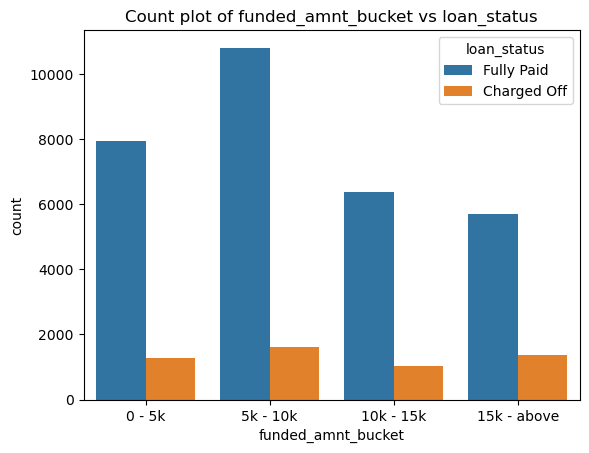

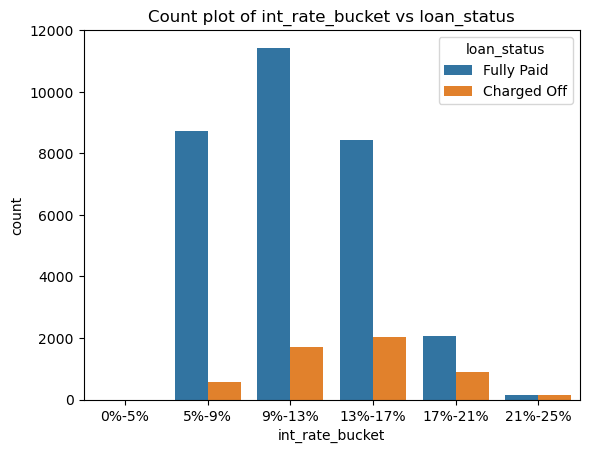

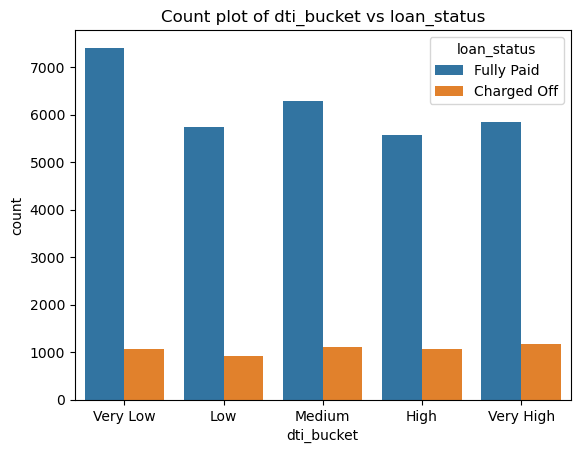

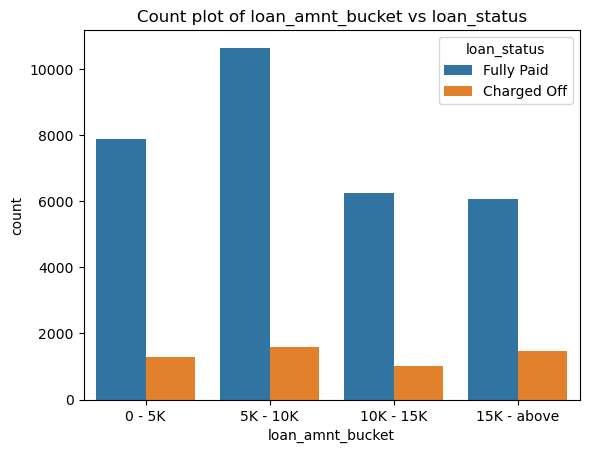

In [66]:
#Bivariate quantitative variable
bq_columns_to_plot = ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']
for column in bq_columns_to_plot:
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'Count plot of {column} vs loan_status')
    plt.show()

Inference:
Most defaulters had loans of $15,000 or more.
High Debt-to-Income (DTI) ratios were common among those who charged off.
Defaulters often had interest rates between 13% and 17%.
Those who charged off typically reported an annual income below $40,000.


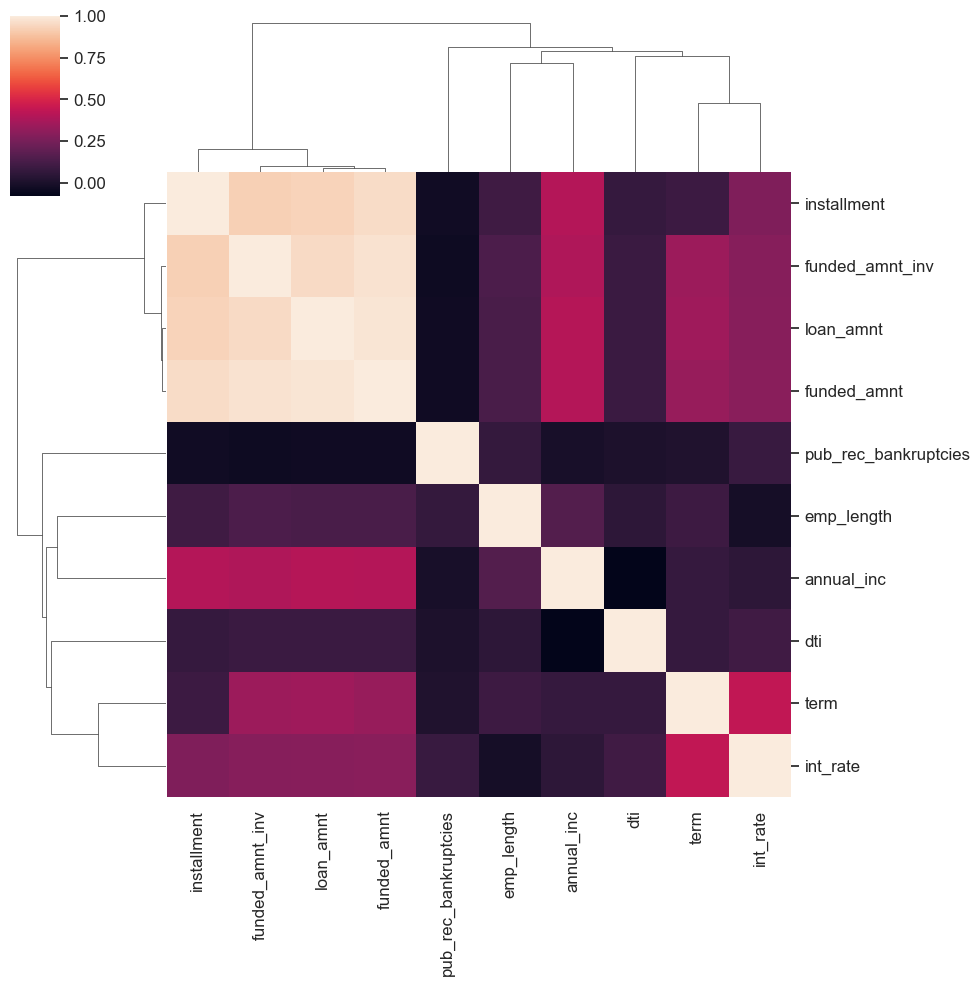

In [67]:
corr = df[num_cols].corr()
sns.set(font_scale=1.1)

sns.clustermap(corr)
plt.show()

Strong Correlation
installment is strongly correlated with funded_amnt, loan_amnt, and funded_amnt_inv.
term has a strong correlation with interest rate.
annual_inc is strongly correlated with loan_amount.

Weak Correlation
dti has weak correlations with most fields.
emp_length also shows weak correlations with most fields.

Negative Correlation
pub_rec_bankrupticies negatively correlates with almost all fields.
annual_inc has a negative correlation with dti.
ith dti.
